# Description

This notebook generates the different panels in Figures 8, 9 and Suppl. Fig X, which summarizes the results of the SI evaluation at the single-scan level.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import xarray as xr
import os.path as osp
import numpy as np
from statannotations.Annotator import Annotator

from utils.basics import PNAS2015_subject_list, PRJ_DIR
from pylab import subplot
from utils.io import load_LE_SI, load_TSNE_SI, load_UMAP_SI

In [3]:
wls, wss = 45, 1.5
si       = {}

# 1. Load Group Level SIs for all MLTs

## 1.1. Load SI for Laplacian Eigenmaps
In this case, we restrict results to: Original Data & Correlation distance

In [4]:
%%time
si['LE'] = load_LE_SI(sbj_list=['ALL','Procrustes'],check_availability=False, verbose=True, wls=wls, wss=wss,   ms=[2,3,5,10,15,20,25,30], dist_metrics=['correlation'], input_datas=['Original'])
si['LE'] = si['LE'].set_index(['Subject','Input Data','Norm','Metric','Knn','m','Target']).sort_index()

Final Dimensions:   0%|          | 0/8 [00:00<?, ?it/s]

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

-e "/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data_Interim/PNAS2015/ALL/LE/Original/ALL_Craddock_0200.WL045s.WS1.5s.LE_correlation_k0005_m0010.asis.SI.pkl" -e "/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data_Interim/PNAS2015/ALL/LE/Original/ALL_Craddock_0200.WL045s.WS1.5s.LE_correlation_k0005_m0010.zscored.SI.pkl" 

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

-e "/data/SFIMJGC_HCP7T/manifold_learning_fmri/Data_Interim/PNAS2015/ALL/LE/Original/ALL_Craddock_0200.WL045s.WS1.5s.LE_correlation_k0005_m0015.asis.SI.pkl" 

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

Distance Metric:   0%|          | 0/1 [00:00<?, ?it/s]

++ INFO [load_LE_SI]: Number of files missing: [3/1280] files
CPU times: user 6.55 s, sys: 130 ms, total: 6.68 s
Wall time: 6.76 s


## 1.2. Load SI for UMAP

In this case we restrict results to: Original Data & Euclidean distance

In [5]:
%%time
si['UMAP'] = load_UMAP_SI(sbj_list=['ALL','Procrustes'],check_availability=False, verbose=True, wls=wls, wss=wss,   ms=[2,3,5,10,15,20,25,30], dist_metrics=['euclidean'], input_datas=['Original'])
si['UMAP'] = si['UMAP'].set_index(['Subject','Input Data','Norm','Metric','Knn','m','Alpha','Init','MinDist','Target']).sort_index()

Subjects::   0%|          | 0/2 [00:00<?, ?it/s]

Data Inputs::   0%|          | 0/1 [00:00<?, ?it/s]

Data Inputs::   0%|          | 0/1 [00:00<?, ?it/s]

++ INFO [load_UMAP_SI]: Number of files missing = [0/3840] files
CPU times: user 25.3 s, sys: 346 ms, total: 25.6 s
Wall time: 25.9 s


## 1.3. Load SI for TSNE

In this case, we restrict results to: Original Data & Correlation Distance & Alpha = 10,1000 & M = 2,3,5,10.

This is necessary given how long it takes for T-SNE to run

In [6]:
%%time
si['TSNE'] = load_TSNE_SI(sbj_list=['Procrustes','ALL'],check_availability=False, verbose=False, wls=wls, wss=wss,   ms=[2,3,5,10], dist_metrics=['correlation'], input_datas=['Original'], alphas=[10,1000])
si['TSNE'] = si['TSNE'].set_index(['Subject','Input Data','Norm','Metric','PP','m','Alpha','Init','Target']).sort_index()

Subjects::   0%|          | 0/2 [00:00<?, ?it/s]

Data Inputs::   0%|          | 0/1 [00:00<?, ?it/s]

Data Inputs::   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 3.05 s, sys: 63.4 ms, total: 3.11 s
Wall time: 3.33 s


## 1.4. Summarize loaded data and change labels for plotting purposes

In [7]:
print('LE:   ' , [(name,len(si['LE'].index.get_level_values(name).unique())) for name in si['LE'].index.names])
print('TSNE: ' , [(name,len(si['TSNE'].index.get_level_values(name).unique())) for name in si['TSNE'].index.names])
print('UMAP: ' , [(name,len(si['UMAP'].index.get_level_values(name).unique())) for name in si['UMAP'].index.names])

LE:    [('Subject', 2), ('Input Data', 1), ('Norm', 2), ('Metric', 1), ('Knn', 40), ('m', 8), ('Target', 2)]
TSNE:  [('Subject', 2), ('Input Data', 1), ('Norm', 2), ('Metric', 1), ('PP', 21), ('m', 4), ('Alpha', 2), ('Init', 1), ('Target', 2)]
UMAP:  [('Subject', 2), ('Input Data', 1), ('Norm', 2), ('Metric', 1), ('Knn', 40), ('m', 8), ('Alpha', 3), ('Init', 1), ('MinDist', 1), ('Target', 2)]


In [8]:
for tech in ['LE','TSNE','UMAP']:
    index_names = list(si[tech].index.names)
    index_names = [name if name != 'Input Data' else 'Input' for name in index_names]
    index_names = [name if name != 'Metric'     else 'Distance' for name in index_names]
    index_names = [name if name != 'Norm'       else 'Normalization' for name in index_names]
    index_names = [name if name != 'Subject'    else 'Grouping Method' for name in index_names]

    
    si[tech].reset_index(inplace=True)
    si[tech].rename(columns={"Metric":"Distance","Input Data":"Input","Norm":"Normalization","Subject":"Grouping Method"},inplace=True)
    
    si[tech].replace('asis','None', inplace=True)
    si[tech].replace('zscored','Z-score', inplace=True)
    si[tech].replace('ALL','Concat. + '+tech, inplace=True)
    si[tech].replace('Procrustes',tech+' + Procrustes', inplace=True)
    si[tech].replace('correlation','Correlation', inplace=True)
    si[tech].replace('euclidean','Euclidean', inplace=True)
    si[tech].replace('cosine','Cosine', inplace=True)
    si[tech].replace('Null_ConnRand','Conn. Rand.', inplace=True)
    si[tech].replace('Null_PhaseRand','Phase Rand.', inplace=True)
    si[tech].set_index(index_names, inplace=True)

# 2. Results for Laplacian Eigenmaps

* We will plot distributions of $SI_{task}$ and $SI_{subject}$ for both group aggregation methods.
* For $SI_{task}$, we will aditionally highlight the portion of the distribution for the "LE + Procrustes" approach that relies on m > 3.

Text(0.5, 1.0, 'Group LE | Subject Separability')

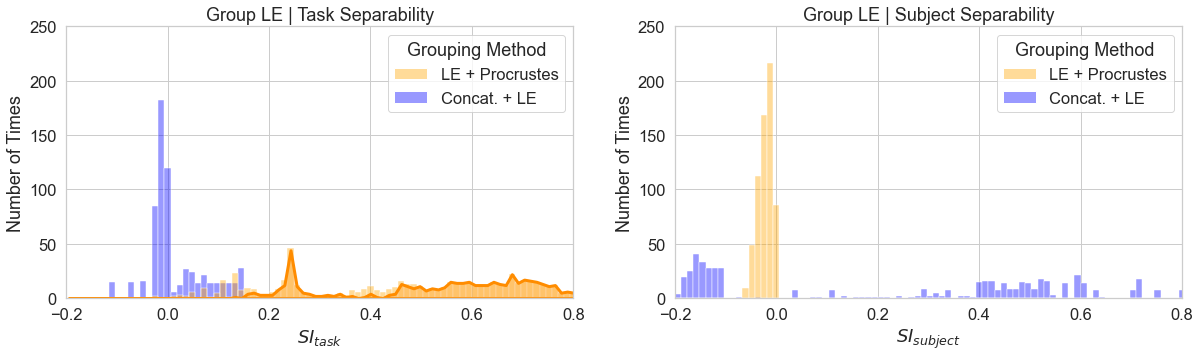

In [10]:
sns.set(font_scale=1.5, style='whitegrid')
fig,axs=plt.subplots(1,2,figsize=(20,5))
sns.histplot(data=si['LE'].loc[:,'Original',:,:,:,:,'Window Name'].reset_index(), x='SI',hue='Grouping Method', hue_order=['LE + Procrustes','Concat. + LE'], palette=['Orange','Blue'], kde=False, ax=axs[0], bins=np.linspace(start=-.2,stop=1,num=100), alpha=.4)
sns.histplot(data=si['LE'].loc['LE + Procrustes','Original',:,:,:,[5,10,15,20,25,30],'Window Name'].reset_index(), x='SI',hue='Grouping Method', hue_order=['LE + Procrustes'], palette=['DarkOrange'], lw=3, kde=False, ax=axs[0], bins=np.linspace(start=-.2,stop=1,num=100), alpha=.3, element='poly', legend=False)
axs[0].set_ylim(0,250);
axs[0].set_ylabel('Number of Times');
axs[0].set_xlabel('$SI_{task}$')
axs[0].set_xlim(-.2,.8)
axs[0].set_title('Group LE | Task Separability')

sns.histplot(data=si['LE'].loc[:,'Original',:,:,:,:,'Subject'].reset_index(), x='SI',hue='Grouping Method', hue_order=['LE + Procrustes','Concat. + LE'], palette=['Orange','Blue'], kde=False, ax=axs[1], bins=np.linspace(start=-.2,stop=1,num=100), alpha=.4)
axs[1].set_ylim(0,250);
axs[1].set_ylabel('Number of Times');
axs[1].set_xlabel('$SI_{subject}$')
axs[1].set_xlim(-.2,.8)
axs[1].set_title('Group LE | Subject Separability')

# 3. Results for UMAP

* We will plot distributions of $SI_{task}$ and $SI_{subject}$ for both group aggregation methods.
* For $SI_{task}$, we will aditionally highlight the portion of the distribution for the "UMAP + Procrustes" approach that relies on m > 3.
* For $SI_{subject}$, we will highlight the portions of the "Concat + UMAP" distribution that corresponds to normalized and non-normalized data.

Text(0.5, 1.0, 'Group UMAP | Subject Separability')

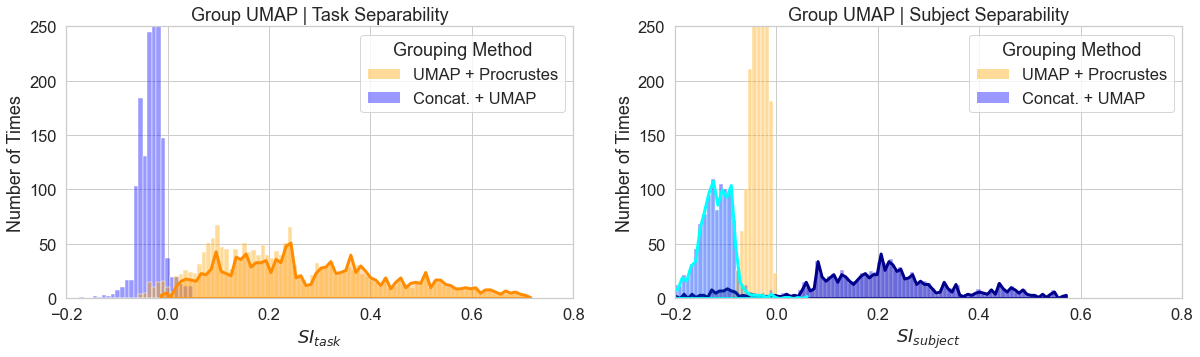

In [11]:
sns.set(font_scale=1.5, style='whitegrid')
fig,axs=plt.subplots(1,2,figsize=(20,5))
sns.histplot(data=si['UMAP'].loc[:,'Original',:,:,:,:,:,:,:,'Window Name'].reset_index(), x='SI',hue='Grouping Method', hue_order=['UMAP + Procrustes','Concat. + UMAP'], palette=['Orange','Blue'], kde=False, ax=axs[0], bins=100, alpha=.4)
sns.histplot(data=si['UMAP'].loc['UMAP + Procrustes','Original',:,:,:,[5,10,15,20,25,30],:,:,:,'Window Name'].reset_index(), x='SI',hue='Grouping Method', hue_order=['UMAP + Procrustes'], palette=['DarkOrange'], kde=False, ax=axs[0], bins=75, alpha=.3, lw=3, element='poly', legend=False)
axs[0].set_ylim(0,250);
axs[0].set_ylabel('Number of Times');
axs[0].set_xlabel('$SI_{task}$')
axs[0].set_xlim(-.2,.8)
axs[0].set_title('Group UMAP | Task Separability')
sns.histplot(data=si['UMAP'].loc[:,'Original',:,:,:,:,:,:,:,'Subject'].reset_index(),      x='SI',hue='Grouping Method', hue_order=['UMAP + Procrustes','Concat. + UMAP'], palette=['Orange','Blue'], kde=False, ax=axs[1], bins=100, alpha=.4)
sns.histplot(data=si['UMAP'].loc['Concat. + UMAP','Original','None',:,:,:,:,:,:,'Subject'].reset_index(), x='SI',hue='Grouping Method', hue_order=['Concat. + UMAP'], palette=['DarkBlue'], kde=False, ax=axs[1], lw=3, bins=100, alpha=.3,element='poly', legend=False)
sns.histplot(data=si['UMAP'].loc['Concat. + UMAP','Original','Z-score',:,:,:,:,:,:,'Subject'].reset_index(), x='SI',hue='Grouping Method', hue_order=['Concat. + UMAP'], palette=['Cyan'], kde=False, ax=axs[1], lw=3, bins=35, alpha=.1,element='poly', legend=False)
axs[1].set_ylim(0,250);
axs[1].set_ylabel('Number of Times');
axs[1].set_xlabel('$SI_{subject}$')
axs[1].set_xlim(-.2,.8)
axs[1].set_title('Group UMAP | Subject Separability')

We now find the best performing embeddings, as those will be added to the figure as representative results

In [12]:
data_wn = si['UMAP'].loc[:,:,:,:,:,:,:,:,:,'Window Name'].reset_index()
data_sb = si['UMAP'].loc[:,:,:,:,:,:,:,:,:,'Subject'].reset_index()

In [13]:
data_wn.sort_values(by='SI',ascending=False).iloc[0:2]

,Grouping Method,Input,Normalization,Distance,Knn,m,Alpha,Init,MinDist,Target,SI
2343,UMAP + Procrustes,Original,None,Euclidean,90,20,0.01,spectral,0.8,Window Name,0.719534
2367,UMAP + Procrustes,Original,None,Euclidean,95,20,0.01,spectral,0.8,Window Name,0.709160


In [14]:
data_sb.sort_values(by='SI',ascending=False).iloc[0:2]

,Grouping Method,Input,Normalization,Distance,Knn,m,Alpha,Init,MinDist,Target,SI
317,Concat. + UMAP,Original,None,Euclidean,70,3,1.0,spectral,0.8,Subject,0.574693
293,Concat. + UMAP,Original,None,Euclidean,65,3,1.0,spectral,0.8,Subject,0.574144


# 4. Results for TSNE

Text(0.5, 1.0, 'Group UMAP | Task Separability')

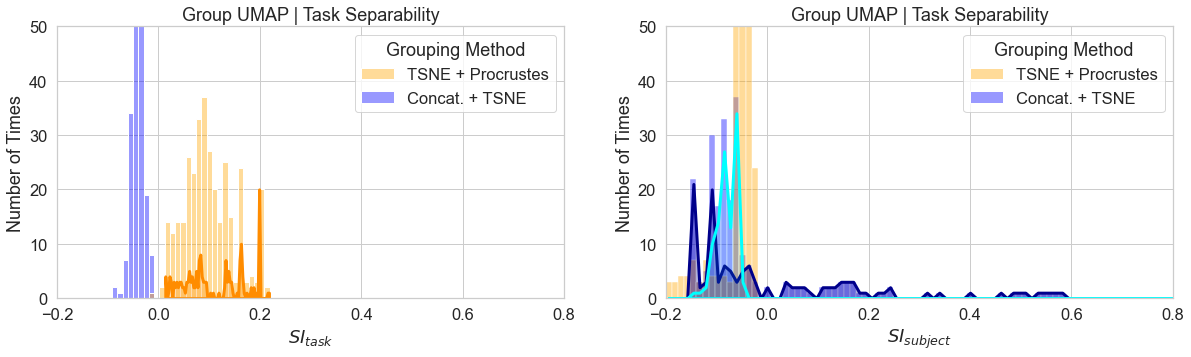

In [54]:
sns.set(font_scale=1.5, style='whitegrid')
fig,axs=plt.subplots(1,2,figsize=(20,5))
sns.histplot(data=si['TSNE'].loc[:,'Original',:,:,:,:,:,:,'Window Name'].reset_index(), x='SI',hue='Grouping Method', hue_order=['TSNE + Procrustes','Concat. + TSNE'], palette=['Orange','Blue'], kde=False, ax=axs[0], bins=30, alpha=.4)
sns.histplot(data=si['TSNE'].loc['TSNE + Procrustes','Original',:,:,:,[5,10,15],:,:,'Window Name'].reset_index(), x='SI',hue='Grouping Method', hue_order=['TSNE + Procrustes'], palette=['DarkOrange'], kde=False, ax=axs[0], bins=75, alpha=.3, lw=3, element='poly', legend=False)

axs[0].set_ylim(0,50);
axs[0].set_ylabel('Number of Times');
axs[0].set_xlabel('$SI_{task}$')
axs[0].set_xlim(-.2,.8)
axs[0].set_title('Group UMAP | Task Separability')
sns.histplot(data=si['TSNE'].loc[:,'Original',:,:,:,:,:,:,'Subject'].reset_index(), x='SI',hue='Grouping Method', hue_order=['TSNE + Procrustes','Concat. + TSNE'], palette=['Orange','Blue'], kde=False, ax=axs[1], bins=np.linspace(start=-.2,stop=1,num=100), alpha=.4)
sns.histplot(data=si['TSNE'].loc['Concat. + TSNE','Original','None',:,:,:,:,:,'Subject'].reset_index(), x='SI',hue='Grouping Method',    hue_order=['Concat. + TSNE'], palette=['DarkBlue'], kde=False, ax=axs[1], lw=3, bins=np.linspace(start=-.2,stop=1,num=100), alpha=.3,element='poly', legend=False)
sns.histplot(data=si['TSNE'].loc['Concat. + TSNE','Original','Z-score',:,:,:,:,:,'Subject'].reset_index(), x='SI',hue='Grouping Method', hue_order=['Concat. + TSNE'], palette=['Cyan'], kde=False, ax=axs[1], lw=3, bins=np.linspace(start=-.2,stop=1,num=100), alpha=.1,element='poly', legend=False)
axs[1].set_ylim(0,50);
axs[1].set_ylabel('Number of Times');
axs[1].set_xlabel('$SI_{subject}$')
axs[1].set_xlim(-.2,.8)
axs[1].set_title('Group UMAP | Task Separability')

In [49]:
data_wn = si['TSNE'].loc[:,:,:,:,:,:,:,:,'Window Name'].reset_index()
data_sb = si['TSNE'].loc[:,:,:,:,:,:,:,:,'Subject'].reset_index()

In [50]:
data_wn.sort_values(by='SI',ascending=False).iloc[0:2]

,Grouping Method,Input,Normalization,Distance,PP,m,Alpha,Init,Target,SI
442,TSNE + Procrustes,Original,Z-score,Correlation,45,10,1000,pca,Window Name,0.219291
426,TSNE + Procrustes,Original,Z-score,Correlation,35,10,1000,pca,Window Name,0.216162


In [51]:
data_sb.sort_values(by='SI',ascending=False).iloc[0:2]

,Grouping Method,Input,Normalization,Distance,PP,m,Alpha,Init,Target,SI
106,Concat. + TSNE,Original,None,Correlation,150,2,1000,pca,Subject,0.578563
117,Concat. + TSNE,Original,None,Correlation,200,2,1000,pca,Subject,0.571827
